# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [7]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
from skimage import data
from skimage import exposure
from skimage import filters
from skimage import io
from skimage import morphology


In [8]:
import numpy as np
from matplotlib import pyplot as plt


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

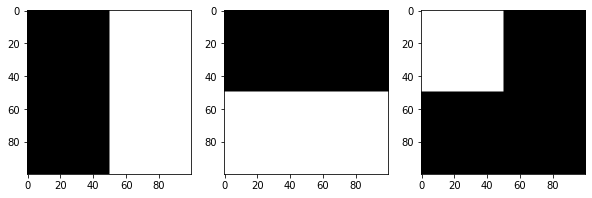

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


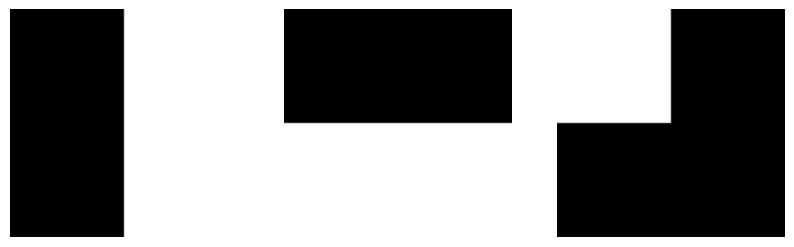

In [11]:
# solution

# Creating 100x100 binary images for each pattern
image1 = np.zeros((100, 100))
image2 = np.zeros((100, 100))
image3 = np.zeros((100, 100))

# Image 1: Vertical split
image1[:, :50] = 0  # Left half black
image1[:, 50:] = 1  # Right half white

# Image 2: Horizontal split
image2[:50, :] = 0  # Top half black
image2[50:, :] = 1  # Bottom half white

# Image 3: Mixed quadrants
image3[:50, :50] = 1  # Top left white
image3[:50, 50:] = 0  # Top right black
image3[50:, :] = 0    # Bottom half black


# Visualizing the three images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(image1, cmap='gray')
axes[0].axis('off')
axes[1].imshow(image2, cmap='gray')
axes[1].axis('off')
axes[2].imshow(image3, cmap='gray')
axes[2].axis('off')

plt.show()

*   Use the above three images to create the following image

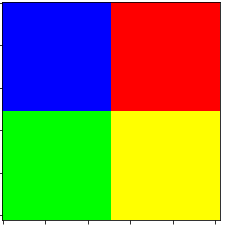
*Hint: Remember channels and color spaces*

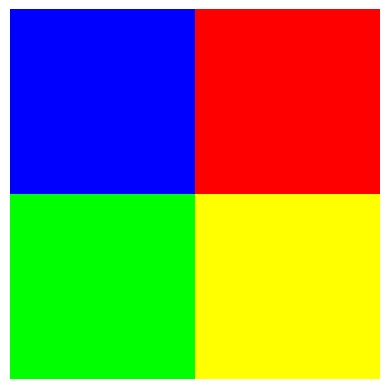

In [13]:
# solution

# Creating the image
colored_image = np.zeros((100, 100, 3))

# Coloring the image

# Top-left: Blue (R=0, G=0, B=1)
colored_image[:50, :50] = [0, 0, 1]  # Blue

# Top-right: Red (R=1, G=0, B=0)
colored_image[:50, 50:] = [1, 0, 0]  # Red

# Bottom-left: Green (R=0, G=1, B=0)
colored_image[50:, :50] = [0, 1, 0]  # Green

# Bottom-right: Yellow (R=1, G=1, B=0)
colored_image[50:, 50:] = [1, 1, 0]  # Yellow

# Displaying the image
plt.imshow(colored_image)
plt.axis('off')  # Turn off the axis
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

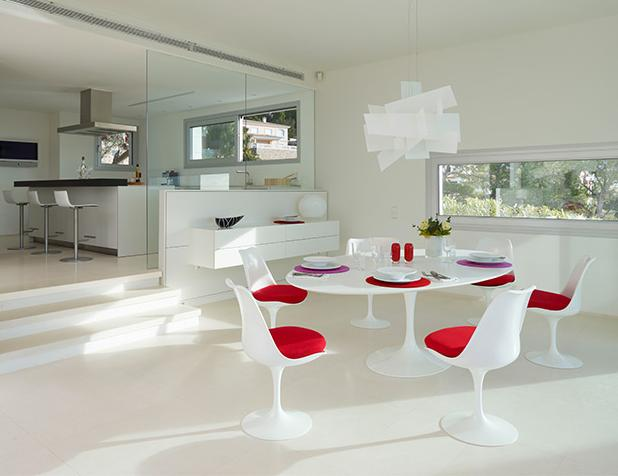

*   Extract individual channels and plot them using matplotlib subplot.



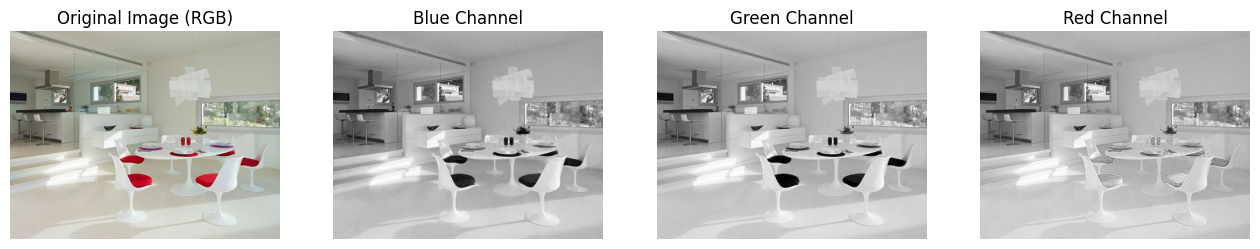

In [16]:
# solution

import cv2
img = cv2.imread('sillas.jpg')

# Converting BGR image to RGB (as OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the image into individual B, G, R channels
B, G, R = cv2.split(img)

# Create subplots to display the original and channel-separated images
fig, ax = plt.subplots(1, 4, figsize=(16, 8))

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image (RGB)')
ax[0].axis('off')

# Display the Blue channel
ax[1].imshow(B, cmap='gray')
ax[1].set_title('Blue Channel')
ax[1].axis('off')

# Display the Green channel
ax[2].imshow(G, cmap='gray')
ax[2].set_title('Green Channel')
ax[2].axis('off')

# Display the Red channel
ax[3].imshow(R, cmap='gray')
ax[3].set_title('Red Channel')
ax[3].axis('off')

# Show the plot
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

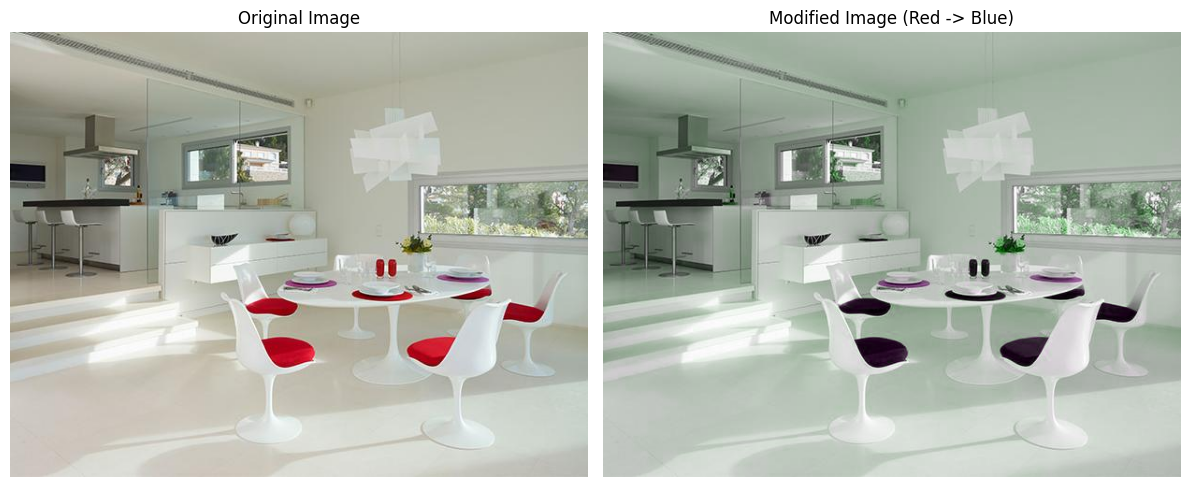

In [17]:
# solution

# Creating a new image where we replace red with blue
R_new = B.copy()  # Replace red channel with the blue channel

# Merging the channels back together with the modified red channel
image_modified = cv2.merge([B, G, R_new])

# Plotting both original and modified images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Displaying the original image
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Displaying the modified image
ax[1].imshow(image_modified)
ax[1].set_title("Modified Image (Red -> Blue)")
ax[1].axis('off')

# Showing the plot
plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

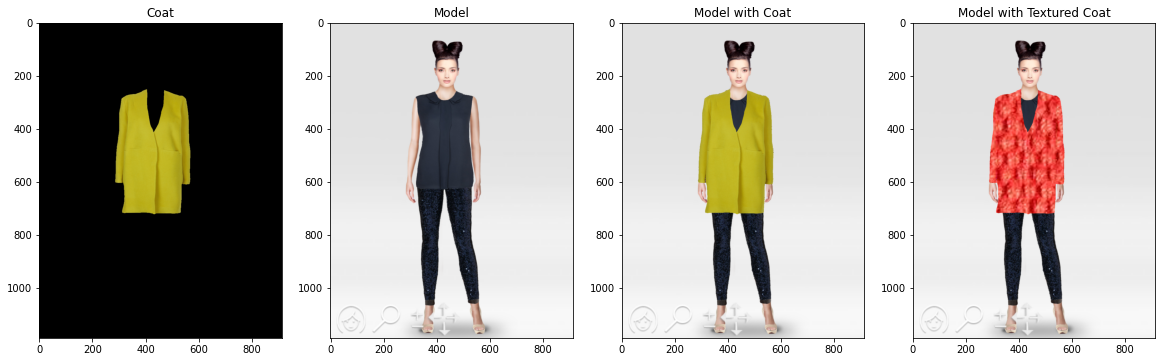

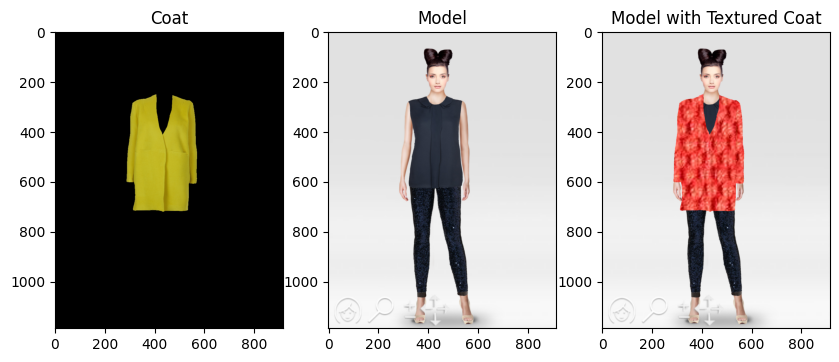

In [18]:
# solution

# Loading the images
model_img = cv2.imread('model.png')
coat_img = cv2.imread('coat.png')
texture_img = cv2.imread('texture2.png') 

# Resizing the texture to match the coat's dimensions
texture_resized = cv2.resize(texture_img, (coat_img.shape[1], coat_img.shape[0]))

# Converting the coat image to grayscale to create a mask
coat_gray = cv2.cvtColor(coat_img, cv2.COLOR_BGR2GRAY)

# Thresholding the gray coat image to create a binary mask
_, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Inverting the mask for the model background
mask_inv = cv2.bitwise_not(mask)

# Using the mask to extract the region of the model without the coat
model_bg = cv2.bitwise_and(model_img, model_img, mask=mask_inv)

# Using the mask to extract the coat from the texture image
coat_texture_fg = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)

# Combining the model background and the textured coat
final_image = cv2.add(model_bg, coat_texture_fg)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(coat_img, cv2.COLOR_BGR2RGB))
plt.title('Coat')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(model_img, cv2.COLOR_BGR2RGB))
plt.title('Model')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Model with Textured Coat')
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




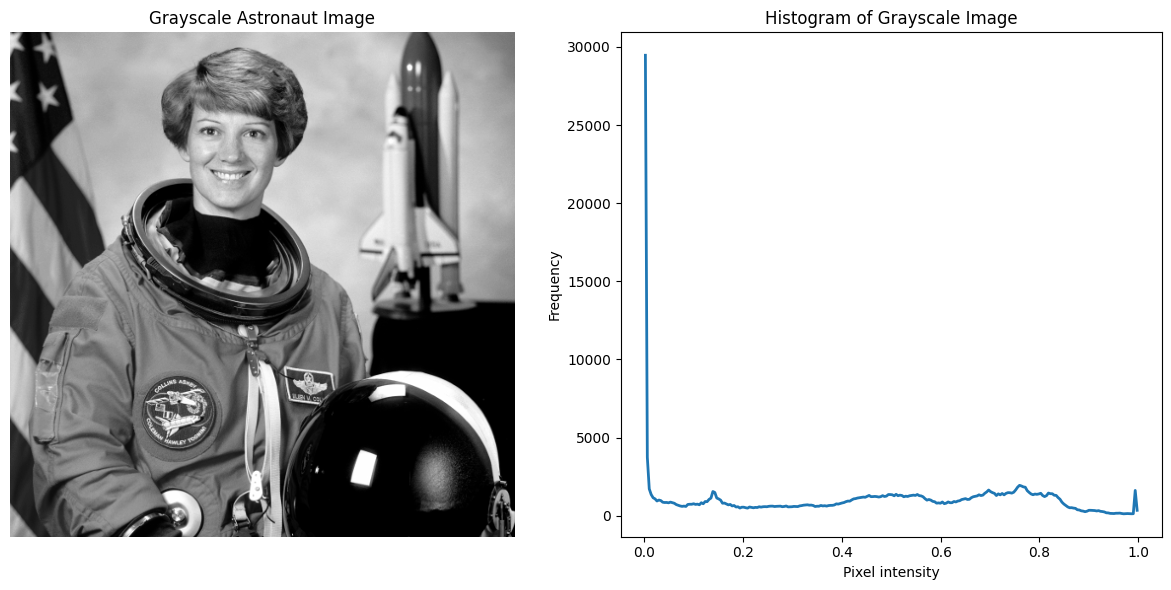

In [19]:
# solution

import matplotlib.pyplot as plt
from skimage import data, color, exposure

# Loading the astronaut image from the data module
astronaut_image = data.astronaut()

# Converting the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_image)

# Computing the histogram of the grayscale image
hist, hist_centers = exposure.histogram(astronaut_gray)

# Plotting the grayscale image and its histogram
plt.figure(figsize=(12, 6))

# Displaying the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(astronaut_gray, cmap='gray')
plt.title('Grayscale Astronaut Image')
plt.axis('off')

# Plotting the histogram
plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, lw=2)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')

# Showing the plots
plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

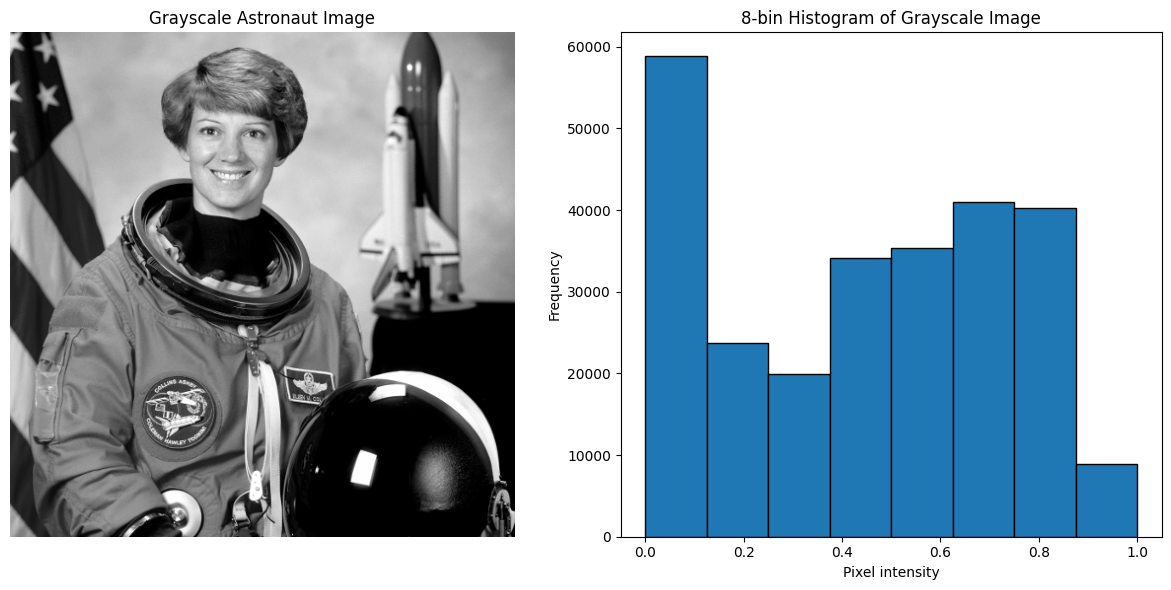

In [24]:
# solution

# Computing the histogram with 8 bins
hist, bin_edges = np.histogram(astronaut_gray, bins=8, range=(0, 1))

# Computing bin centers for plotting
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Plotting the grayscale image and its 8-bin histogram
plt.figure(figsize=(12, 6))

# Displaying the grayscale image
plt.subplot(1, 2, 1)
plt.imshow(astronaut_gray, cmap='gray')
plt.title('Grayscale Astronaut Image')
plt.axis('off')

# Plotting the 8-bin histogram
plt.subplot(1, 2, 2)
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), edgecolor='black', align='center')
plt.title('8-bin Histogram of Grayscale Image')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')

# Showing the plots
plt.tight_layout()
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

With fewer bins the data is grouped into larger ranges, leading to less granularity. This means so details could be missed, a too high bin count could in contrast to that show too much noise. Here it seems like with fewer bins the image seems to show less variation in the grayscale.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


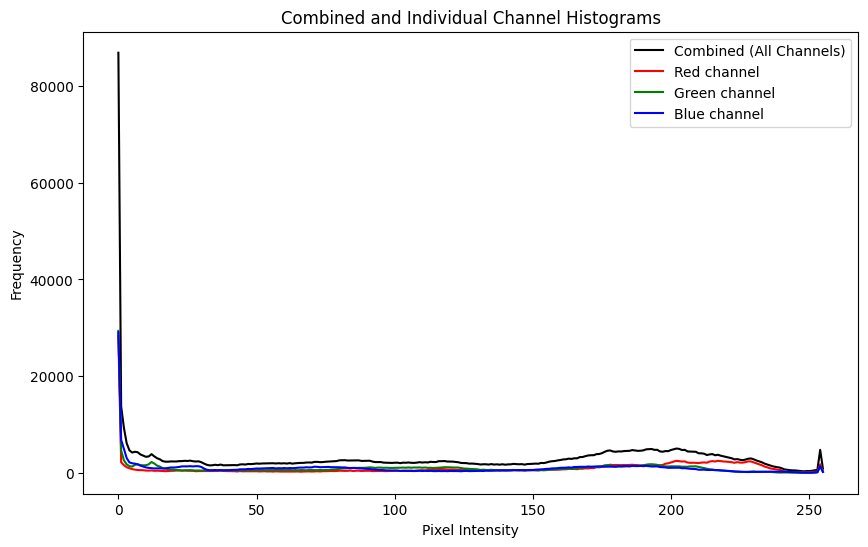

In [27]:
#solution

image = data.astronaut()  

# Computing the histogram for each color channel (R, G, B)
hist_red, bins_red = exposure.histogram(image[:, :, 0], nbins=256)
hist_green, bins_green = exposure.histogram(image[:, :, 1], nbins=256)
hist_blue, bins_blue = exposure.histogram(image[:, :, 2], nbins=256)

# Computing the combined histogram for all channels (total histogram)
hist_total, bins_total = exposure.histogram(image, nbins=256)

# Plotting the histograms for each channel and the total histogram
plt.figure(figsize=(10, 6))

# Plotting combined (total) histogram
plt.plot(bins_total, hist_total, color='black', label='Combined (All Channels)')

# Plotting red channel histogram
plt.plot(bins_red, hist_red, color='red', label='Red channel')

# Plotting green channel histogram
plt.plot(bins_green, hist_green, color='green', label='Green channel')

# Plotting blue channel histogram
plt.plot(bins_blue, hist_blue, color='blue', label='Blue channel')

# Adding title and labels
plt.title('Combined and Individual Channel Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Adding legend
plt.legend()

# Showing the plot
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


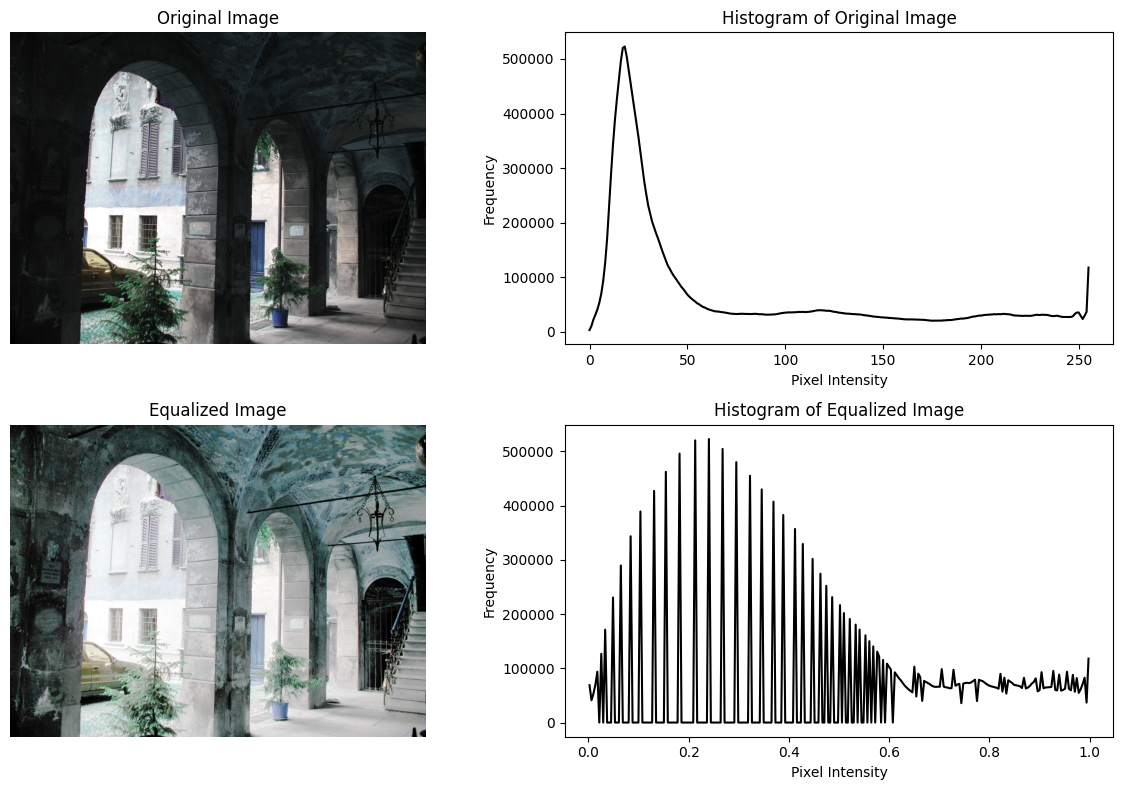

In [28]:
# solution

from skimage.exposure import equalize_hist

aquatermi_lowcontrast = cv2.imread('aquatermi_lowcontrast.jpg') 

hist_orig, bins_orig = exposure.histogram(aquatermi_lowcontrast)

# Performing histogram equalization to enhance contrast
equalized_image = equalize_hist(aquatermi_lowcontrast)

# Computing the histogram of the equalized image
hist_eq, bins_eq = exposure.histogram(equalized_image)

# Plotting the results using a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Showing the original image
axes[0, 0].imshow(aquatermi_lowcontrast, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Showing the histogram of the original image
axes[0, 1].plot(bins_orig, hist_orig, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Showing the equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')

# Showing the histogram of the equalized image
axes[1, 1].plot(bins_eq, hist_eq, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

The image with cdf and interpolation shows finer details through a lowered contrast and makes shadows seem less intense.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



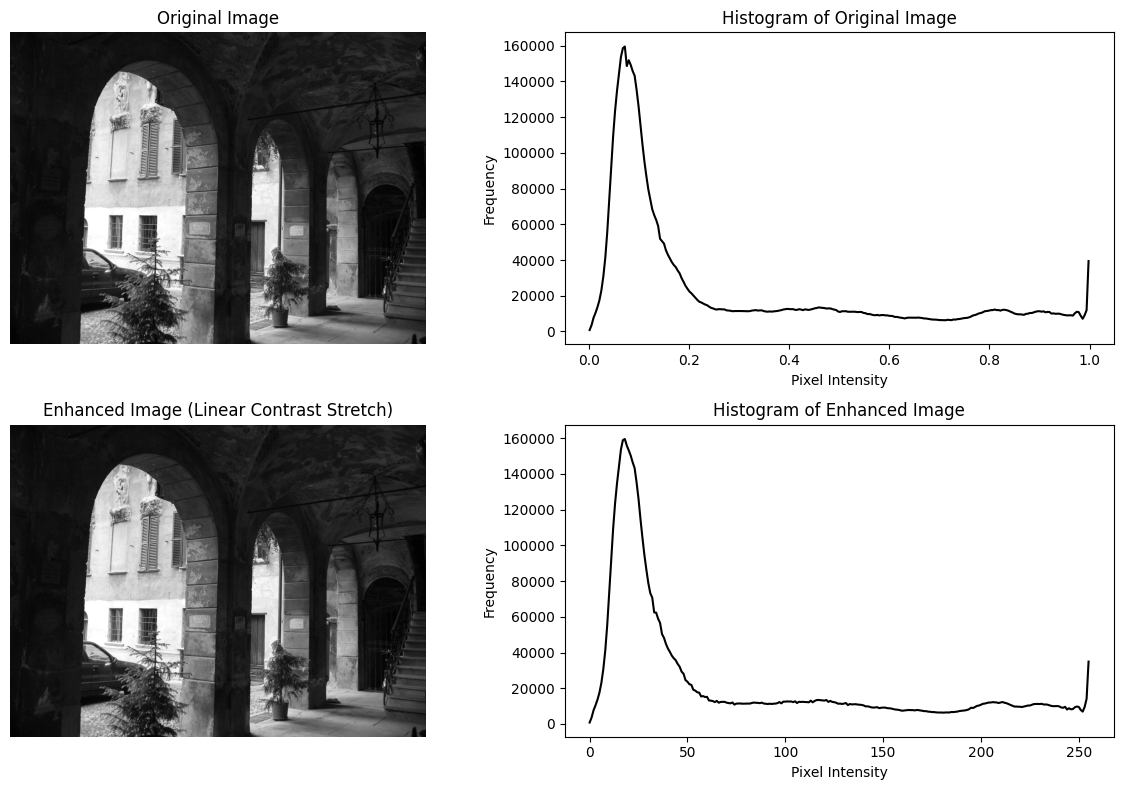

In [31]:
# solution

# Function to perform linear contrast stretching
def linear_contrast_stretch(aquatermi_lowcontrast, bins):
    # Compute the min and max pixel values
    min_pixel = np.min(aquatermi_lowcontrast)
    max_pixel = np.max(aquatermi_lowcontrast)
    
    # Apply the contrast stretch formula to every pixel
    stretched_image = ((aquatermi_lowcontrast - min_pixel) / (max_pixel - min_pixel)) * 255
    
    # Return the stretched image
    return stretched_image.astype(np.uint8)

# Load the image (Replace with your image path)
aquatermi_lowcontrast = io.imread('aquatermi_lowcontrast.jpg', as_gray=True)

# Apply the linear contrast stretching function
enhanced_image = linear_contrast_stretch(aquatermi_lowcontrast, bins=256)

# Compute histograms
hist_orig, bins_orig = exposure.histogram(aquatermi_lowcontrast)
hist_enhanced, bins_enhanced = exposure.histogram(enhanced_image)

# Plotting the results using a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Showing the original image
axes[0, 0].imshow(aquatermi_lowcontrast, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Show the histogram of the original image
axes[0, 1].plot(bins_orig, hist_orig, color='black')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

# Show the enhanced image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title('Enhanced Image (Linear Contrast Stretch)')
axes[1, 0].axis('off')

# Show the histogram of the enhanced image
axes[1, 1].plot(bins_enhanced, hist_enhanced, color='black')
axes[1, 1].set_title('Histogram of Enhanced Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.



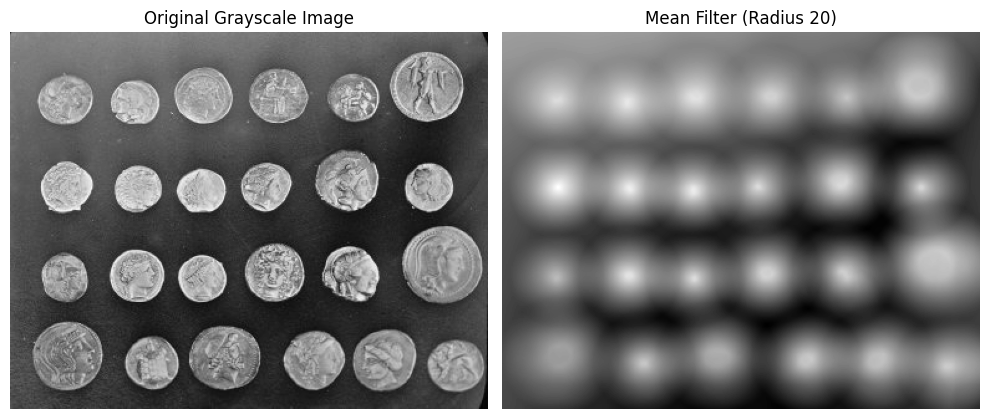

In [40]:
# solution

from skimage import io, img_as_ubyte
from skimage.morphology import disk
from skimage.filters.rank import mean
from skimage import exposure


coins_image = data.coins()
coins_image = img_as_ubyte(coins_image)  # Converting the image to 8-bit unsigned integers for rank filters

# Define the disk structuring element (selem) with radius 20
selem_20 = disk(20)

# Apply mean filter with disk footprint of radius 20 to grayscale image
mean_filtered_20 = mean(coins_image, footprint=selem_20)

# Plotting the original and filtered images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image (grayscale)
axes[0].imshow(coins_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

# Mean Filter with Radius 20
axes[1].imshow(mean_filtered_20, cmap='gray')
axes[1].set_title('Mean Filter (Radius 20)')
axes[1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

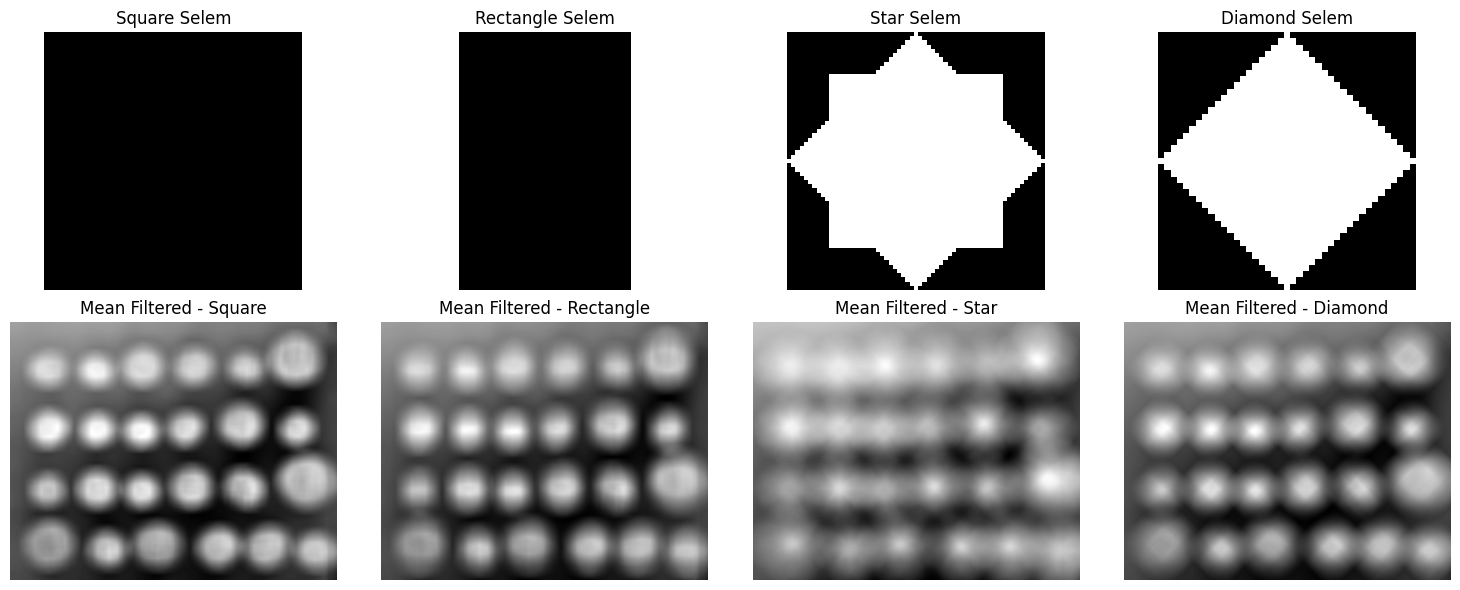

In [37]:
# solution

from skimage.morphology import square, rectangle, star, diamond
from skimage.filters.rank import mean
from skimage.util import img_as_ubyte
from skimage import data

# Defining different structuring elements (selem)
selem_square = square(20)
selem_rectangle = rectangle(30, 20)
selem_star = star(20)
selem_diamond = diamond(20)

# Apply mean filter using the different structuring elements
mean_filtered_square = mean(coins_image, footprint=selem_square)
mean_filtered_rectangle = mean(coins_image, footprint=selem_rectangle)
mean_filtered_star = mean(coins_image, footprint=selem_star)
mean_filtered_diamond = mean(coins_image, footprint=selem_diamond)

# List of structuring elements and their corresponding filtered images
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
filtered_images = [mean_filtered_square, mean_filtered_rectangle, mean_filtered_star, mean_filtered_diamond]
selem_titles = ["Square", "Rectangle", "Star", "Diamond"]

# Create a 2xN subplot where N is the number of structuring elements
fig, axes = plt.subplots(2, len(selems), figsize=(15, 6))

for i, (selem, filtered, title) in enumerate(zip(selems, filtered_images, selem_titles)):
    # Show the structuring element
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f"{title} Selem")
    axes[0, i].axis('off')

    # Show the corresponding filtered image
    axes[1, i].imshow(filtered, cmap='gray')
    axes[1, i].set_title(f"Mean Filtered - {title}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Increasing the radius increases also the smoothing effect. A too high radius will result in an image that's barely recognizable.

*   What is the observed behaviour with difference in the structuring element?



**Solution**

The different structuring elements have different intensities of smoothing the image. (From low to high: Square, Rectangle, Diamond, Star)



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The mean filter calculates the average (mean) of all pixel values within a defined neighborhood (kernel). The center pixel is replaced with this mean value, resulting in a smoothed image. It is simple and effective for reducing noise but can blur edges. It’s suitable for quick noise reduction tasks where preserving fine details isn’t critical.

Gaussian filter uses a kernel derived from the Gaussian function. It gives higher weights to pixels closer to the center of the kernel and lower weights to pixels farther away, based on the Gaussian distribution. The Gaussian filter is more sophisticated, better at preserving edges while reducing noise. It is used in applications that require a balance between noise reduction and maintaining image detail.